In [1]:
import oqupy
import numpy as np
import matplotlib.pyplot as plt
oqupy.__version__

'0.5.0'

In [2]:
sigma_x = oqupy.operators.sigma('x')
sigma_y = oqupy.operators.sigma('y')
sigma_z = oqupy.operators.sigma('z')

In [3]:
correlations = oqupy.PowerLawSD(alpha=0.3,
                                zeta=1,
                                cutoff=5.0,
                                cutoff_type='exponential',
                                temperature=0.0)

In [4]:
bath = oqupy.Bath(sigma_z/2.0, correlations)

In [5]:
tempo_parameters = oqupy.TempoParameters(dt=0.1, tcut=2.0, epsrel=1.0e-4)

In [6]:
ptMPO = oqupy.pt_tempo_compute(bath=bath,
                               start_time=0.0,
                               end_time=16.0,
                               parameters=tempo_parameters)

--> PT-TEMPO computation:
100.0%  160 of  160 [########################################] 00:00:09
Elapsed time: 9.8s


In [7]:
ptMPO.get_bond_dimensions()

array([ 1,  4, 11, 12, 15, 17, 17, 19, 22, 23, 22, 24, 25, 26, 28, 29, 30,
       31, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 32, 30, 29, 28, 27, 25, 24, 22, 21, 19, 18, 17,
       15, 14, 12, 10,  9,  7,  3,  1])

In [8]:
dynamics = oqupy.compute_dynamics(process_tensor=ptMPO,
                                  system=oqupy.System(sigma_x/2.0),
                                  initial_state=oqupy.operators.spin_dm('z+'))

--> Compute dynamics:
100.0%  160 of  160 [########################################] 00:00:02
Elapsed time: 2.6s


In [9]:
t, s_z = dynamics.expectations(sigma_z, real=True)

Text(0, 0.5, '$<\\sigma_z>$')

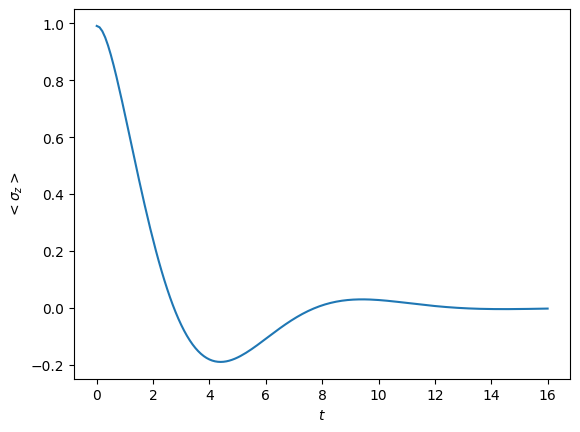

In [10]:
plt.plot(t, s_z)
plt.xlabel(r'$t$')
plt.ylabel(r'$<\sigma_z>$')